In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd

In [91]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [92]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [93]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [94]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [95]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
measurement = base.classes.measurement 
station = base.classes.station

In [97]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(measurement.date).order_by(measurement.date.desc())
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date = last_date[0]
print(last_date)


2017-08-23


In [99]:
# Calculate the date 1 year ago from the last data point in the database
first_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_year)

2016-08-23


In [100]:
# Calculate the date 1 year ago from the last data point in the database
first_year = dt.datetime.strptime(last_date, "%Y-%m-%d")- dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
data_query=session.query(measurement.date,measurement.prcp).filter(measurement.date>=first_year).all()

In [101]:
# Save the query results as a Pandas DataFrame and set the index to the date column
DF_Precipitation_Pandas = pd.DataFrame(data_query, columns = ["date", "precipitation"])
DF_Precipitation_Pandas["date"] = pd.to_datetime(DF_Precipitation_Pandas["date"], format = "%Y-%m-%d")
DF_Precipitation_Pandas.set_index("date", inplace = True)
# Sort the dataframe by date
#2016-2017 order ascending 
DF_Precipitation_Pandas = DF_Precipitation_Pandas.sort_values(by="date", ascending = True)
DF_Precipitation_Pandas

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


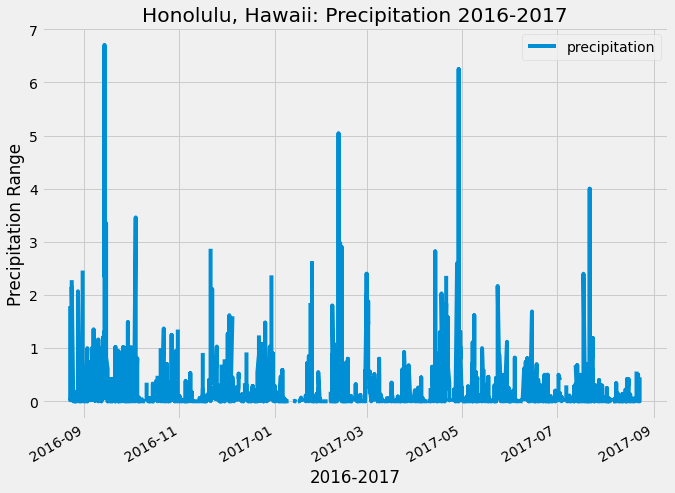

In [102]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (10, 8))
DF_Precipitation_Pandas.plot(ax = ax, x_compat = True)
ax.set_xlabel('2016-2017')
ax.set_ylabel('Precipitation Range')
ax.set_title("Honolulu, Hawaii: Precipitation 2016-2017")
plt.show()

In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data
DF_Precipitation_Pandas.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [104]:
# Design a query to show how many stations are available in this dataset?


In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [106]:
locations = session.query(measurement).group_by(measurement.station).count()
print(locations)

9


In [107]:
# List the stations and the counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [108]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = stations[0][0]
most_active_station

temp_stats = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [109]:
# Choose the station with the highest number of temperature observations.
station_most_tempstats = session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).first()
station_most_tempstats = station_most_tempstats [0]
station_most_tempstats


'USC00519281'

In [114]:
station_most_tempstats = 'USC00519281'

In [116]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempstats_12months = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == station_most_tempstats).\
                filter(measurement.date >= first_year).all

tempstats_12months = pd.DataFrame(tempstats_12months, columns = ['date', 'temperature'])
tempstats_12months_df.set_index('date', inplace = True)

ValueError: DataFrame constructor not properly called!

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
